
**Welcome to the SDMetrics library!** SDMetrics (Synthetic Data Metrics) is an open source Python library for evaluating synthetic data.

In this notebook, we compare some real and synthetic demo data using SDMetrics. Along the way, we'll generate a shareable report, use it to discover some insights and create visual graphics.

# Installing SDMetrics

You can get started with SDMetrics by running the code in this notebook. SDMetrics is available under the MIT License.

The command below will install the latest `sdmetrics` Python package.

In [ ]:
%pip install sdmetrics

In [9]:
import sdmetrics

print(sdmetrics.__version__)

0.14.0


# Loading the data

SDMetrics is **model-agnostic**, which means that it works with synthetic data created by any model at any time.

To get started, you need:

1. The real data, represented as a pandas.DataFrame
2. Your synthetic data, represented as a pandas.DataFrame
3. [Metadata](https://docs.sdv.dev/sdmetrics/getting-started/metadata), represented as a dictionary

The command below downloads some demo data and metadata that we can use.

In [10]:
from sdmetrics import load_demo

real_data, synthetic_data, metadata = load_demo(modality='single_table')

Both the real and synthetic data describe different students. They have the same column names.

In [11]:
real_data.head()

,student_id,gender,second_perc,high_perc,high_spec,degree_perc,degree_type,work_experience,experience_years,employability_perc,mba_spec,mba_perc,salary,placed,start_date,end_date,duration
0,17264,M,67.00,91.00,Commerce,58.00,Sci&Tech,False,0,55.0,Mkt&HR,58.80,27000.0,True,2020-07-23,2020-10-12,3.0
1,17265,M,79.33,78.33,Science,77.48,Sci&Tech,True,1,86.5,Mkt&Fin,66.28,20000.0,True,2020-01-11,2020-04-09,3.0
2,17266,M,65.00,68.00,Arts,64.00,Comm&Mgmt,False,0,75.0,Mkt&Fin,57.80,25000.0,True,2020-01-26,2020-07-13,6.0
3,17267,M,56.00,52.00,Science,52.00,Sci&Tech,False,0,66.0,Mkt&HR,59.43,NaN,False,NaT,NaT,NaN
4,17268,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,False,0,96.8,Mkt&Fin,55.50,42500.0,True,2020-07-04,2020-09-27,3.0


In [4]:
synthetic_data.head()

,start_date,end_date,salary,duration,student_id,high_perc,high_spec,mba_spec,second_perc,gender,degree_perc,placed,experience_years,employability_perc,mba_perc,work_experience,degree_type
0,2020-02-29,2020-06-19,NaN,6.0,0,78.36,Commerce,Mkt&Fin,80.72,M,66.15,True,1,62.31,73.40,False,Comm&Mgmt
1,2020-01-04,NaT,23019.0,8.0,1,67.88,Science,Mkt&Fin,68.26,M,67.63,True,1,96.57,63.11,True,Comm&Mgmt
2,NaT,2020-10-09,20103.0,12.0,2,69.10,Commerce,Mkt&HR,81.37,M,72.44,True,1,73.77,67.17,False,Comm&Mgmt
3,2020-01-01,2020-10-23,25268.0,6.0,3,77.80,Commerce,Mkt&Fin,61.69,M,58.21,False,1,68.48,61.33,False,Comm&Mgmt
4,2020-01-06,2020-10-31,NaN,11.0,4,53.42,Commerce,Mkt&Fin,50.00,M,54.58,False,1,72.45,58.98,False,Comm&Mgmt


The metadata is a dictionary that describes the data types of the different columns. This helps SDMetrics understand which metrics to apply to which columns.

In [5]:
import pprint

pprint.pprint(metadata)

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1',
 'columns': {'degree_perc': {'computer_representation': 'Float',
                             'sdtype': 'numerical'},
             'degree_type': {'sdtype': 'categorical'},
             'duration': {'computer_representation': 'Int64',
                          'sdtype': 'numerical'},
             'employability_perc': {'computer_representation': 'Float',
                                    'sdtype': 'numerical'},
             'end_date': {'datetime_format': '%Y-%m-%d', 'sdtype': 'datetime'},
             'experience_years': {'computer_representation': 'Float',
                                  'sdtype': 'numerical'},
             'gender': {'sdtype': 'categorical'},
             'high_perc': {'computer_representation': 'Float',
                           'sdtype': 'numerical'},
             'high_spec': {'sdtype': 'categorical'},
             'mba_perc': {'computer_representation': 'Float',
                          'sdtype': 'numerical'},
 

# Diagnostic

Let's get started by running a diagnostic. This report performs some **basic validity checks** such as:
- ensuring that the primary keys are always unique
- verifying that the synthetic data is within the correct ranges (or category options)
- etc.



In [12]:
from sdmetrics.reports.single_table import DiagnosticReport

diagnostic = DiagnosticReport()
diagnostic.generate(real_data, synthetic_data, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 17/17 [00:00<00:00, 1587.90it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 761.63it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%


✅ Here we have <font color="green">**verified that the score is 100%**</font>, meaning that the data is fully valid and has the correct structure.

<font color="red">**What if the score weren't 100%?**</font> Use the diagnostic report details to understand why. Supply any property name to get a breakdown of the metrics and the scores. Use this to identify which columns contain invalid data.

In [13]:
validity_details = diagnostic.get_details('Data Validity')
validity_details.head()

,Column,Metric,Score
0,start_date,BoundaryAdherence,1.0
1,end_date,BoundaryAdherence,1.0
2,salary,BoundaryAdherence,1.0
3,duration,BoundaryAdherence,1.0
4,student_id,KeyUniqueness,1.0


If the score isn't perfect, we recommend contacting your synthetic data provider with the details of these breakdowns.

_If you're using an SDV synthesizer, contact the SDV team by [filing a GitHub issue](https://github.com/sdv-dev/SDV/issues/new/choose)._

# Quality
Now that we've verified the data is valid, we can now compare the real vs. synthetic data in terms of the **quality**. The quality report measures statistical similarity between the real and synthetic data.

The quality score may vary between 0% and 100%. Unlike the diagnostic, it's ok if the score is not exactly 100%: Based on the exact AI model, it may not always be possible -- or even necessary -- to get a perfect quality score.

In [14]:
from sdmetrics.reports.single_table import QualityReport

quality_report = QualityReport()
quality_report.generate(real_data, synthetic_data, metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 17/17 [00:00<00:00, 2272.10it/s]|
Column Shapes Score: 85.11%

(2/2) Evaluating Column Pair Trends: |██████▋   | 91/136 [00:00<00:00, 311.49it/s]|

/Users/minhkau/Documents/TUDelft/Year 3/RP/Code/tabular-gpt/.venv10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



(2/2) Evaluating Column Pair Trends: |██████████| 136/136 [00:00<00:00, 273.82it/s]|
Column Pair Trends Score: 82.5%

Overall Score (Average): 83.8%


This report indicates that the real and the synthetic data have 83% basic, statistical similarity to each other.

## Which statistics are used?

The quality quality measures 2 properties to form the overall score:

1. `Column Shapes`, or the _marginal distributions_ of the columns
2. `Column Pair Trends`, or the _correlations_ between the columns

More information is available [in the API docs](https://docs.sdv.dev/sdmetrics/reports/quality-report/whats-included)

We can look at the detailed breakdowns of each of these scores to identify areas for improvement.

## Column Shapes (Marginal Distributions)

From the details, we can se that the marginal distribution scores vary for the different columns.

In [9]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,start_date,KSComplement,0.662162
1,end_date,KSComplement,0.849291
2,salary,KSComplement,0.853140
3,duration,KSComplement,0.439189
4,high_perc,KSComplement,0.897674
5,high_spec,TVComplement,0.986047
6,mba_spec,TVComplement,0.986047
7,second_perc,KSComplement,0.897674
8,gender,TVComplement,1.000000
9,degree_perc,KSComplement,0.916279


Some columns, such as `degree`, have great scores of over 0.90. We can visualize the data in order to see this.

In [15]:
from sdmetrics.visualization import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='degree_perc',
)

fig.show()

Other columns such as `duration` have lower scores. We can see that the synthetic data here doesn't quite cover the full range of the real data.

In [16]:
from sdmetrics.visualization import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='duration',
)

fig.show()

## Column Pair Trends (Correlations)

We can also compare the correlations between the real and synthetic data. The report can visualize the scores as a heatmap for easy inspection.

In [17]:
quality_report.get_visualization('Column Pair Trends')

Visualize the data in 2D for even more insight. For example, we can verify that both the real and synthetic data show a slight positive correlation between the `'degree_perc'` and `'high_perc'` columns.

In [18]:
from sdmetrics.visualization import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['degree_perc', 'high_perc'],
)

fig.show()

# Applying Individual Metrics

If you'd like to explore your data further, you can manually apply any of the [available metrics](https://docs.sdv.dev/sdmetrics/metrics/metrics-glossary) in the library.

For example, let's apply [MissingValueSimilarity](https://docs.sdv.dev/sdmetrics/metrics/metrics-glossary/missingvaluesimilarity) metric, which can be useful for applications like **software testing**. It tells us whether the synthetic data has the same amount of missing values as the real data.

In [ ]:
from sdmetrics.single_column import MissingValueSimilarity

MissingValueSimilarity.compute(
    real_data=real_data['salary'],
    synthetic_data=synthetic_data['salary']
)

0.9441860465116279

We can also check for **data privacy**. The [NewRowSynthesis](https://docs.sdv.dev/sdmetrics/metrics/metrics-glossary/newrowsynthesis) metric tells us whether the synthetic data contains any exact copies of the real data -- or whether the rows are new.

In [ ]:
from sdmetrics.single_table import NewRowSynthesis

NewRowSynthesis.compute(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

1.0

It looks like 100% of the rows in the synthetic data are new -- meaning that there are **no exact copies** of the real data!

# More Resources

The SDMetrics library is part of the SDV Project, built & maintained by DataCebo.

For more information about the library visit the [documentation website](https://docs.sdv.dev/sdmetrics/).

To connect with the community, [join our Slack channel](https://bit.ly/sdv-slack-invite)! We have hundreds of users discussing their synthetic data needs.

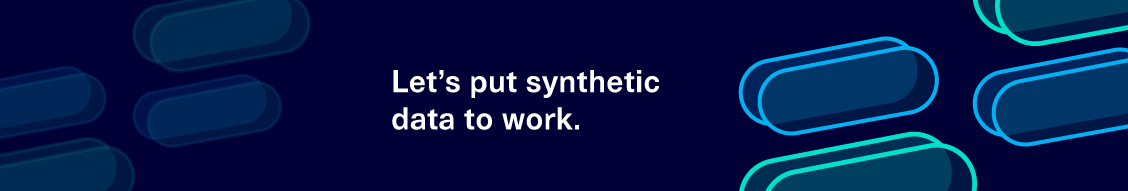